In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
data_set = pd.read_csv("Weather.csv")

c:\users\hunkm\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data_set.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_set.shape

(119040, 31)

In [5]:
data_set.describe()

,STA,WindGustSpd,MaxTemp,MinTemp,MeanTemp,YR,MO,DA,DR,SPD,...,FT,FB,FTI,ITH,PGT,SD3,RHX,RHN,RVG,WTE
count,119040.000000,532.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,533.000000,532.000000,...,0.0,0.0,0.0,0.0,525.000000,0.0,0.0,0.0,0.0,0.0
mean,29659.435795,37.774534,27.045111,17.789511,22.411631,43.805284,6.726016,15.797530,26.998124,20.396617,...,NaN,NaN,NaN,NaN,12.085333,NaN,NaN,NaN,NaN,NaN
std,20953.209402,10.297808,8.717817,8.334572,8.297982,1.136718,3.425561,8.794541,15.221732,5.560371,...,NaN,NaN,NaN,NaN,5.731328,NaN,NaN,NaN,NaN,NaN
min,10001.000000,18.520000,-33.333333,-38.333333,-35.555556,40.000000,1.000000,1.000000,2.000000,10.000000,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,11801.000000,29.632000,25.555556,15.000000,20.555556,43.000000,4.000000,8.000000,11.000000,16.000000,...,NaN,NaN,NaN,NaN,8.500000,NaN,NaN,NaN,NaN,NaN
50%,22508.000000,37.040000,29.444444,21.111111,25.555556,44.000000,7.000000,16.000000,32.000000,20.000000,...,NaN,NaN,NaN,NaN,11.600000,NaN,NaN,NaN,NaN,NaN
75%,33501.000000,43.059000,31.666667,23.333333,27.222222,45.000000,10.000000,23.000000,34.000000,23.250000,...,NaN,NaN,NaN,NaN,15.000000,NaN,NaN,NaN,NaN,NaN
max,82506.000000,75.932000,50.000000,34.444444,40.000000,45.000000,12.000000,31.000000,78.000000,41.000000,...,NaN,NaN,NaN,NaN,23.900000,NaN,NaN,NaN,NaN,NaN


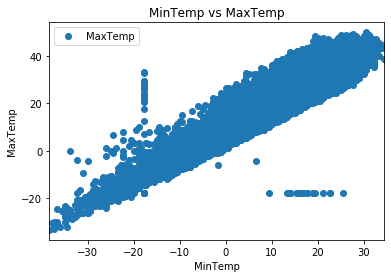

In [6]:
#We have taken MinTemp and MaxTemp for doing our analysis.
data_set.plot(x='MinTemp', y='MaxTemp' , style = 'o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

#Below is a 2-D graph between MinTemp and MaxTemp.

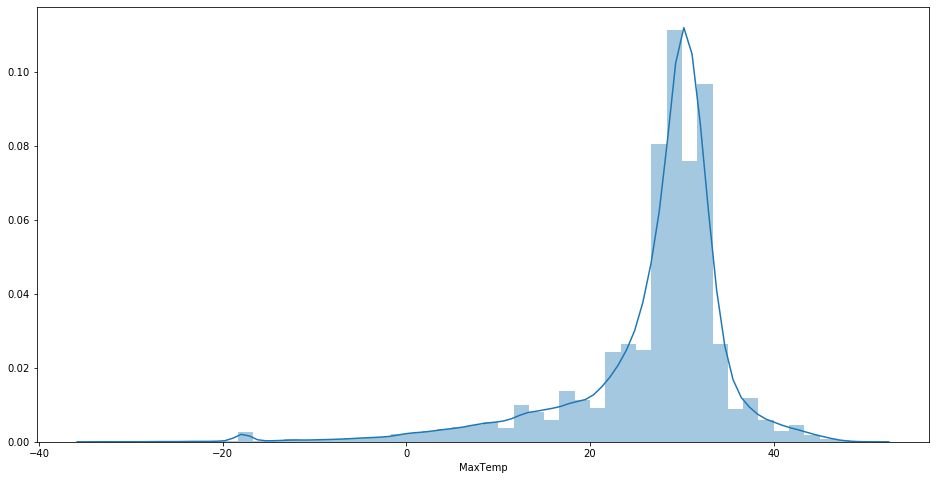

In [7]:
#Let’s check the average max temperature.
#And once we plot it we can observe that the Average Maximum Temperature is Between Nearly 25 and 35.

plt.figure(figsize=(16,8))
plt.tight_layout()
seabornInstance.distplot(data_set['MaxTemp'])
plt.show()

In [8]:
#Our next step is to divide the data into “attributes” and “labels”
# We want to predict the MaxTemp depending upon the MinTemp recorded.
#Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable,
#and the label will be the “MaxTemp” column which is stored in y variable.

x = data_set['MinTemp'].values.reshape(-1,1)
y = data_set['MaxTemp'].values.reshape(-1,1)

In [9]:
#Next, we split 80% of the data to the training set while 20% of the data to test set using below code.

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/4, random_state=0)

In [10]:
#After splitting the data into training and testing sets, finally, the time is to train our algorithm.
#For that, we need to import LinearRegression class, instantiate it, and call the fit() method along with our training data.

regressor = LinearRegression()
regressor.fit(x_train,y_train) ##training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#To retrieve the intercept:
print(f"Intercept : {regressor.intercept_}")

#For retrieving the slope:
print(f"Slope : {regressor.coef_}")

Intercept : [10.66173469]
Slope : [[0.9199768]]


In [12]:
#This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%(0.91299768%).

In [13]:
#Making predictions on the test data.
y_pred = regressor.predict(x_test)

In [14]:
#Now compare the actual output values for x_test with the predicted values, execute the following script:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,28.888889,33.661155
1,31.111111,30.083467
2,27.222222,26.505780
3,28.888889,31.105664
4,23.333333,15.772717
...,...,...
29755,30.000000,30.594565
29756,31.111111,28.550172
29757,31.111111,24.972485
29758,34.444444,35.705548


In [15]:
#We can also visualize comparison result as a bar graph.
#As the number of records is huge, for representation purpose Let's take just 25 records.

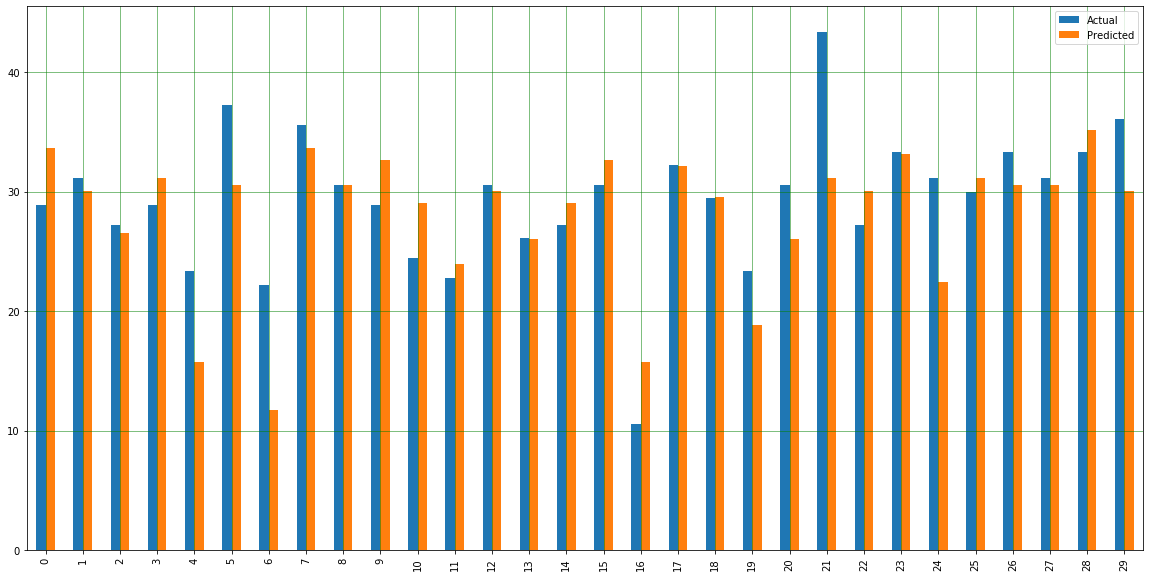

In [16]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(20,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

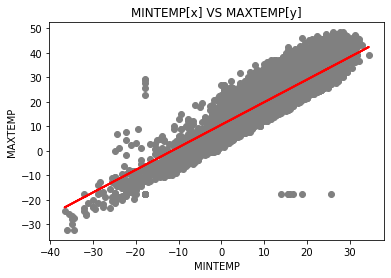

In [17]:
#Let's plot our straight line with the test data
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.title("MINTEMP[x] VS MAXTEMP[y]")
plt.xlabel("MINTEMP")
plt.ylabel("MAXTEMP")
plt.show()

In [18]:
#The straight line in the above graph shows our algorithm is correct.

In [19]:
#The final step is to evaluate the performance of the algorithm,
#this step is particularly important to compare how well different algorithms perform on a particular dataset. 

In [20]:
#For regression algorithms, three evaluation metrics are commonly used:

#1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. 
#2. Mean Squared Error (MSE) is the mean of the squared errors.
#3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors


In [21]:
#Let’s find the values for these metrics using our test data.

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.2013408532178995
Mean Squared Error: 17.538534658551548
Root Mean Squared Error: 4.187903372637858
